In [1]:
import numpy as np
from obj_func import obj_func
from read_instance import read_instance
import random
import seaborn as sns
from random import randint
import sys 

In [2]:
#file=open(r"E:\monit\Documents\TTP\Instancias\a280-ttp\a280_n279_uncorr_01.ttp","r")
#file=open(r"E:\monit\Documents\TTP\Instancias\a280-ttp\a280_n279_bounded-strongly-corr_01.ttp","r")
file=open(r"E:\monit\Documents\TTP\Instancias\a280-ttp\my_test.ttp","r")
dic=read_instance(file)


In [3]:
def create_knap_pop(dic,c):
    pop_knap=np.zeros((c,dic["number of items"]))
    for i in range(pop_knap.shape[0]):
        item_pick=[]
        for x in range(dic["number of items"]): 
            item_pick.append(random.randint(0, 1))
        item_pick2=np.array(item_pick)
        pop_knap[i]=item_pick2
    return pop_knap

In [4]:
def create_distance_matrix(dic):
    chords=dic["coords citites"]
    matrix=np.zeros((len(chords),len(chords)))
    ind1=0
    for x in chords:
        ind2=0
        for f in chords:
            point1=np.array((int(x[0]),int(x[1])))
            point2=np.array((int(f[0]),int(f[1])))
            matrix[ind1,ind2]=np.linalg.norm(point1-point2)
            ind2=ind2+1
        ind1=ind1+1
    return matrix

In [5]:
def create_tsp_pop(dic,x):
    pop_tsp=np.zeros((x,dic["number cities"]-1))
    minimo=0
    maximo=10
    #print(minimo,maximo,pop_tsp.shape[1])
    for i in range(pop_tsp.shape[0]):
        #order_cities=list(range(2,dic["number cities"]+1 ))
        dist=(maximo-minimo) * np.random.random_sample((pop_tsp.shape[1] )) +minimo    
        pop_tsp[i,:]=dist
    return pop_tsp

In [6]:
def cont_to_disc_tsp(dic,pop_tsp):
    pop_tsp_change=pop_tsp.copy()
    pop_tsp_disc=np.zeros((pop_tsp.shape))
    number_cities=dic["number cities"]-1
    #print(pop_tsp_change.shape)
    for l in range(pop_tsp.shape[0]):
        #print(l)
        for x in range(number_cities):
            
            minx=list(zip(*np.where(pop_tsp_change[l,:]==np.amin(pop_tsp_change[l,:]))))
            #print(minx)
            #print(pop_tsp_change[l,minx[0][0]])
            pop_tsp_disc[l,minx[0][0]]=x+2
            pop_tsp_change[l,minx[0][0]]=np.inf
        #print(pop_tsp_disc[l])
    return pop_tsp_disc


In [7]:
def fit_loop(dic,pop_tsp,pop_knap):
    fitness=np.zeros((pop_tsp.shape[0]))
    for l in range(pop_tsp.shape[0]):
        fitness[l]=obj_func(dic,pop_tsp[l,:],pop_knap[l,:])

    return fitness

In [30]:
def diff_evolution(fitness,pop_tsp,pop_knap,f,r,matrix,dic):
    dim=np.shape(pop_tsp)[0]
    minimo=np.amin(matrix[matrix>0])
    maximo=np.amax(matrix[matrix>0])
    new_population_tsp=np.zeros(np.shape(pop_tsp))
    new_population_knap=np.zeros(np.shape(pop_knap))
    for k in range(dim):  
        selector=random.sample(range(dim), 3)
        #diff evolution for tsp
        mutated_tsp=pop_tsp[selector[2]].copy()  + (f*(pop_tsp[selector[0]].copy()-pop_tsp[selector[1]].copy()))
        mutated_tsp=np.reshape(mutated_tsp,(1,mutated_tsp.shape[0]))
        pre_pop_tsp=np.zeros((mutated_tsp.shape))
        for z in range(pop_tsp.shape[1]):
            if random.uniform(0,1)>r:
                pre_pop_tsp[0,z]=mutated_tsp[0,z]
            else:
                pre_pop_tsp[0,z]=pop_tsp[selector[2]].copy()[z]
        pre_pop_tsp_fit=(cont_to_disc_tsp(dic,pre_pop_tsp)).astype(np.int32)
        #print(pre_pop_tsp_fit,cont_to_disc_tsp(dic,np.reshape(pop_tsp[k,:],(1,pop_tsp.shape[1])),matrix))

        #diff evolution for knap, bin dif evolutio
        pre_nap=pop_knap[selector[0],:].copy()
        for l in range(pop_knap.shape[1]):
            if pop_knap[selector[1],l]!=pop_knap[selector[2],l] and random.uniform(0,1)>f and random.uniform(0,1)>r:
                pre_nap[l]=1-pre_nap[l]
        fitness1=fitness[k]
        fitness2=obj_func(dic,pre_pop_tsp_fit[0,:],pre_nap)            
        if fitness2>fitness1:
            new_population_tsp[k,:]=np.reshape(pre_pop_tsp,(pre_pop_tsp.shape[1]))
            new_population_knap[k,:]=pre_nap
            #print(fitness2)
        else:
            new_population_tsp[k,:]=pop_tsp[k,:]
            new_population_knap[k,:]=pop_knap[k,:]
            #print(fitness1)
        #print(fitness1,fitness2)

     
    return new_population_tsp,new_population_knap

generation:  0  maximo:  30.251262658470836
generation:  1  maximo:  45.0
generation:  2  maximo:  45.0
generation:  3  maximo:  45.0
generation:  4  maximo:  45.0
generation:  5  maximo:  45.0
generation:  6  maximo:  45.0
generation:  7  maximo:  45.0
generation:  8  maximo:  45.0
generation:  9  maximo:  45.0
generation:  10  maximo:  45.0
generation:  11  maximo:  45.0


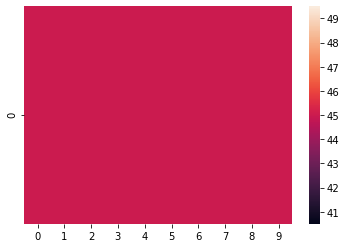

In [31]:
ps=10#pop length
iterations=50
cr=0.9
f=0.8
matrix=create_distance_matrix(dic)
pop_tsp=create_tsp_pop(dic,ps)
pop_knap=create_knap_pop(dic,ps)
pop_tsp_for_fit=cont_to_disc_tsp(dic,pop_tsp) 
fitness=fit_loop(dic,pop_tsp_for_fit,pop_knap)
z=True
l=0
lastfit=np.amax(fitness)
count=0
fitnesses=[]
while z :
#for l in range(iterations):
    pop_tsp,pop_knap=diff_evolution(fitness,pop_tsp,pop_knap,f,cr,matrix,dic)
    pop_tsp_for_fit=cont_to_disc_tsp(dic,pop_tsp)
    fitness=fit_loop(dic,pop_tsp_for_fit,pop_knap)
    print("generation: ",l, " maximo: ", np.amax(fitness))  
    l=l+1
    
    if lastfit>=np.amax(fitness):
        count=count+1
    else:
        count=0
    lastfit=np.amax(fitness)
    if count==10:
        z=False
    fitnesses.append(fitness)
p1 = sns.heatmap(np.reshape(fitness,(1,fitness.shape[0])))    

In [23]:
for p in range(13):
    print(fitnesses[p])

[-74.92460307  -7.14285714 -14.3154504  -20.         -77.78174593
 -22.24873734 -14.3154504  -24.14213562 -20.         -77.78174593]
[-74.92460307  -7.14285714  -7.14285714  -7.14285714 -24.14213562
 -11.64213562 -14.3154504  -24.14213562 -20.         -20.        ]
[  8.54169246  -7.14285714  -7.14285714  -7.14285714 -24.14213562
 -11.64213562  -7.5        -24.14213562 -20.         -20.        ]
[  8.54169246  -7.14285714  -7.14285714  -7.14285714 -11.64213562
 -11.64213562  -7.5        -24.14213562 -20.          -7.5       ]
[  8.54169246  -7.14285714  -7.14285714  -7.14285714 -11.64213562
 -11.64213562  -7.5        -20.           8.54169246  -7.5       ]
[  8.54169246  -7.14285714  -7.14285714  15.71428571 -11.64213562
 -11.64213562  -7.5        -20.           8.54169246  15.71428571]
[  8.54169246  -7.14285714  -7.14285714  15.71428571  15.71428571
   8.54169246  15.71428571 -11.64213562   8.54169246  15.71428571]
[15.71428571  8.54169246 15.71428571 15.71428571 15.71428571 15.71428